In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
os.chdir('c:\\Users\\syedd\\Downloads')

In [25]:
#Get the data
Qsar=pd.read_table("qsar_oral_toxicity.csv",header=None)
Qsar=Qsar[0].str.split(";",expand=True)
pd.options.display.max_columns = None 
Qsar.rename(columns={1024:"Experimental_Class"}, inplace=True)
Qsar_dummies=pd.get_dummies(Qsar["Experimental_Class"],drop_first=True)
Qsar=Qsar.join(Qsar_dummies)
Qsar.drop("Experimental_Class",axis=1, inplace=True)
#standardize features by removing mean and scaling unit varience
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [9]:
#since we use 80 for train and 20 for test, we split the data set
X_train,X_test,y_train,y_test= train_test_split(Qsar.drop('positive',axis=1),Qsar['positive'],test_size=0.2)
X_train_scaled=sc.fit_transform(X_train)

In [10]:
#Train the model using the training data
Lr= LogisticRegression(max_iter=1000,solver="lbfgs")
Lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [11]:
#Scorning the model
y_pred = Lr.predict(X_test)
#Evaluate the model using the test data and find the test error rate
test_error_rate = np.mean(y_pred != y_test)
print('Test error rate:', test_error_rate)
Lr.score(X_test,y_test)


Test error rate: 0.08449138410227905


0.9155086158977209

In [24]:
y_test


4201    0
8062    0
5828    0
3789    0
8543    0
       ..
3355    0
5836    0
1191    0
7875    0
7657    0
Name: positive, Length: 1799, dtype: uint8

In [21]:
from sklearn import metrics

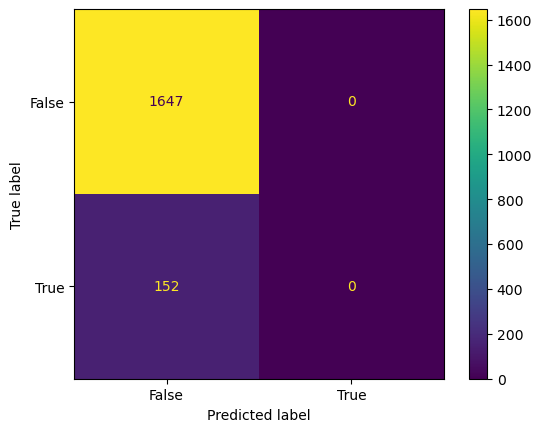

In [22]:
confusion_matrix=confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Report

Since this dataset contains 1024 rows but in column, we need to separate into 1024 columns.Then, we need to train the data set by using validation 80 for train and 20 for test.Lastly, we can see that the result is 0.08727070594774874 which has small error with 91.27% accurancy for this test. This model results shows good accurancy and high performance for predict some case, with the less error percentage in this model.

As we can see, the model has predicted 1647 from 1799 which are correct means that the model also have fail to predict correct but from accurancy we can assure that is a good model because it has good performance quality.

LDA or QDA is not suitable for this dataset because they are sensitive outlier and can affect decision boundaries plus classification accuracy by distorting estimations of covariance. Since the data is contains of binary classfication, the logistic regression are quite performing between those LDA and QDA.